In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
plt.rcParams.update({'font.family': 'serif', 'font.size': 12, 'mathtext.fontset': 'cm'})

In [2]:
folder_1 = Path('integration_outputs/barrel_sec_data_1')
section_data_1 = [np.loadtxt(folder_1 / f'sec_data_{i}.csv', delimiter=',') for i in range(1, 27)]
section_data_1 = np.array(section_data_1)
gamma_avg_1 = np.loadtxt(folder_1 / 'gamma_avg.csv', delimiter=',')
print(gamma_avg_1.shape)
print(section_data_1.shape)
folder_2 = Path('integration_outputs/barrel_sec_data_2')
section_data_2 = [np.loadtxt(folder_2 / f'sec_data_{i}.csv', delimiter=',') for i in range(1, 24)]
section_data_2 = np.array(section_data_2)
gamma_avg_2 = np.loadtxt(folder_2 / 'gamma_avg.csv', delimiter=',')
print(gamma_avg_2.shape)
print(section_data_2.shape)

(26,)
(26, 1001, 2)
(23,)
(23, 1001, 2)


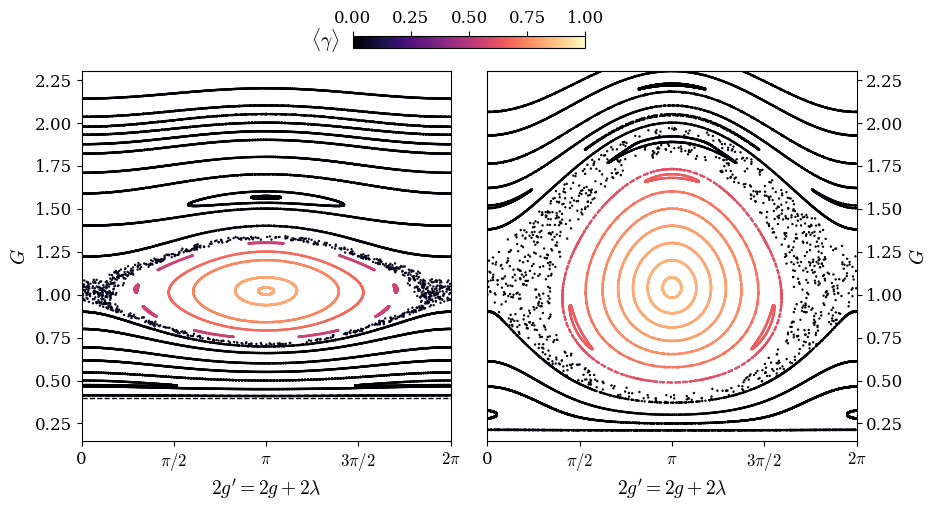

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'wspace': 0.1})
scat = axs[0].scatter(2*section_data_1[...,0].T.flatten(), section_data_1[...,1].T.flatten(), s=0.5, 
            c=np.tile(np.abs(gamma_avg_1), section_data_1.shape[1]).flatten(), cmap='magma', norm=plt.Normalize(0, 1))

clb = fig.colorbar(scat, ax=axs, orientation='horizontal', location='top', shrink=0.3, ticks=[0, 0.25, 0.5, 0.75, 1])
clb.ax.set_ylabel(r'$\langle\gamma\rangle$', fontsize=14, rotation=0, labelpad=20, y=-0.5)
axs[1].scatter(2*section_data_2[...,0].T.flatten(), section_data_2[...,1].T.flatten(), s=0.5, 
            c=np.tile(np.abs(gamma_avg_2), section_data_2.shape[1]).flatten(), cmap='magma', norm=plt.Normalize(0, 1))
axs[0].axhline(0.4, color='black', lw=1, ls='--')
for ax in axs:
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
    ax.set_xlabel("$2g'=2g+2\lambda$", fontsize=14)
    ax.set_ylabel("$G$", fontsize=14)
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(0.15, 2.3)
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
# plt.savefig('../figs/barrel_section.pdf', bbox_inches='tight')

In [4]:
folder = Path('integration_outputs/hyp_sec_data')
section_data = [np.loadtxt(folder / f'sec_data_{i}.csv', delimiter=',') for i in range(1, 19)]
section_data = np.array(section_data)
print(section_data.shape)

(18, 2001, 2)


(2.35, 4.8)

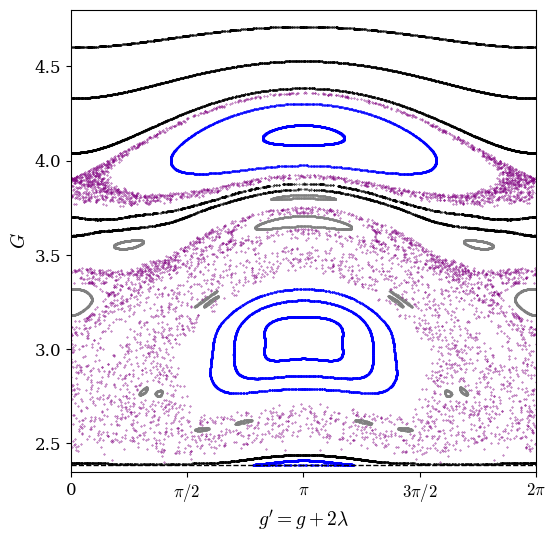

In [5]:
plt.figure(figsize=(6,6))
colors = ['blue', 'black', 'blue', 'blue', 'blue', 'gray', 'purple', 'purple', 'gray', 'gray', 'black', 'black', 'blue', 'blue', 'purple', 'black', 'black', 'black']
for i in range(18):
    plt.scatter(section_data[i,...,0], section_data[i,...,1], s=0.1, c=colors[i])
plt.axhline(2.38546, color='black', lw=1, ls='--')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])

plt.xlabel("$g'=g+2\lambda$", fontsize=14)
plt.ylabel("$G$", fontsize=14)
plt.xlim(0, 2*np.pi)
plt.ylim(2.35, 4.8)
# plt.savefig('../figs/hyperion_section.pdf', bbox_inches='tight')

In [6]:
lyaps = np.loadtxt('integration_outputs/lyaps.csv', delimiter=',')
lyaps_axi = np.loadtxt('integration_outputs/lyaps_axi.csv', delimiter=',')

Text(0.5, 1.0, 'Axisymmetric model ($\\tilde{\\mathcal{H}}$)')

/tmp/ipykernel_2199728/2848403433.py:42: RuntimeWarning: divide by zero encountered in divide
  return 1/x * (2*np.pi/21.28)


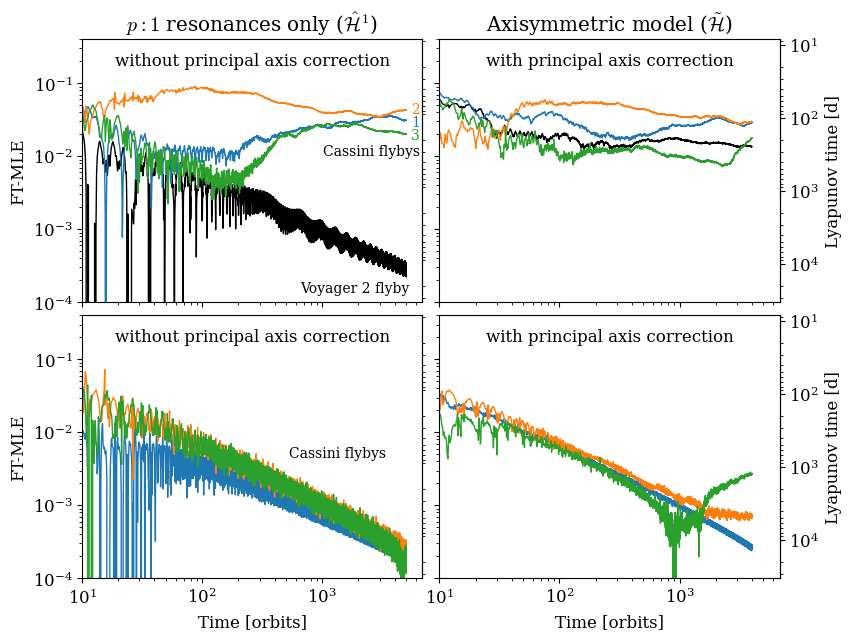

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7), sharex=True, sharey=True, gridspec_kw={'hspace': 0.05, 'wspace':0.05})
axs[0,0].plot(lyaps[:,0]/(2*np.pi), lyaps[:,1], lw=1, label='1981-08-23', color='black')
axs[0,0].plot(lyaps[:,0]/(2*np.pi), lyaps[:,2], lw=1, label='2005-06-10')
axs[0,0].plot(lyaps[:,0]/(2*np.pi), lyaps[:,3], lw=1, label='2005-08-16')
axs[0,0].plot(lyaps[:,0]/(2*np.pi), lyaps[:,4], lw=1, label='2005-09-25')
axs[1,0].plot(lyaps[:,0]/(2*np.pi), lyaps[:,5], lw=1, label='2005-06-10')
axs[1,0].plot(lyaps[:,0]/(2*np.pi), lyaps[:,6], lw=1, label='2005-08-16')
axs[1,0].plot(lyaps[:,0]/(2*np.pi), lyaps[:,7], lw=1, label='2005-09-25')

axs[0,1].plot(lyaps_axi[:,0]/(2*np.pi), lyaps_axi[:,1], lw=1, label='1981-08-23', color='black')
axs[0,1].plot(lyaps_axi[:,0]/(2*np.pi), lyaps_axi[:,2], lw=1, label='2005-06-10')
axs[0,1].plot(lyaps_axi[:,0]/(2*np.pi), lyaps_axi[:,3], lw=1, label='2005-08-16')
axs[0,1].plot(lyaps_axi[:,0]/(2*np.pi), lyaps_axi[:,4], lw=1, label='2005-09-25')
axs[1,1].plot(lyaps_axi[:,0]/(2*np.pi), lyaps_axi[:,5], lw=1, label='2005-06-10')
axs[1,1].plot(lyaps_axi[:,0]/(2*np.pi), lyaps_axi[:,6], lw=1, label='2005-08-16')
axs[1,1].plot(lyaps_axi[:,0]/(2*np.pi), lyaps_axi[:,7], lw=1, label='2005-09-25')
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
# axs[0].text(0.5, 0.95, 'Voyager & Cassini observations', transform=axs[0].transAxes, fontsize=12, ha='center', va='top')
axs[0,0].text(0.8, 0.08, 'Voyager 2 flyby', transform=axs[0,0].transAxes, fontsize=10, ha='center', va='top')
axs[0,0].text(0.85, 0.6, 'Cassini flybys', transform=axs[0,0].transAxes, fontsize=10, ha='center', va='top')
axs[1,0].text(0.75, 0.5, 'Cassini flybys', transform=axs[1,0].transAxes, fontsize=10, ha='center', va='top')
axs[0,0].text(0.98, 0.71, '1', transform=axs[0,0].transAxes, fontsize=10, ha='center', va='top', color='C0')
axs[0,0].text(0.98, 0.76, '2', transform=axs[0,0].transAxes, fontsize=10, ha='center', va='top', color='C1')
axs[0,0].text(0.98, 0.66, '3', transform=axs[0,0].transAxes, fontsize=10, ha='center', va='top', color='C2')
for ax in axs[:,0]:
    ax.text(0.5, 0.95, 'without principal axis correction', transform=ax.transAxes, fontsize=12, ha='center', va='top')
for ax in axs[:,1]:
    ax.text(0.5, 0.95, 'with principal axis correction', transform=ax.transAxes, fontsize=12, ha='center', va='top')
# axs[0].legend()
axs[0,0].set_xlim(1e1, None)
axs[0,0].set_ylim(1e-4, 0.4)
# axs[0].set_xlabel('Time [orbits]')
axs[1,0].set_xlabel('Time [orbits]')
axs[1,1].set_xlabel('Time [orbits]')
axs[0,0].set_ylabel('FT-MLE')
axs[1,0].set_ylabel('FT-MLE')

def forward_tick_function(x):
    return 1/x * (21.28/(2*np.pi))
def inverse_tick_function(x):
    return 1/x * (2*np.pi/21.28)
    
secaxs = [ax.secondary_yaxis('right', functions=(forward_tick_function, inverse_tick_function)) for ax in axs.flatten()]
for secax in secaxs[::2]:
    secax.set_yticks([])
for secax in secaxs[1::2]:
    secax.set_ylabel('Lyapunov time [d]')
axs[0,0].set_title('$p:1$ resonances only ($\hat{\mathcal{H}}^1$)')
axs[0,1].set_title(r'Axisymmetric model ($\tilde{\mathcal{H}}$)')
# fig.savefig('../figs/lyapunov.pdf', bbox_inches='tight')

In [8]:
print((1/lyaps[-1,1:])/(2*np.pi)*21.28)
print((1/lyaps_axi[-1,1:])/(2*np.pi)*21.28)

[11150.30179716   109.23707289    77.63354084   167.87643942
 16401.17445026 12621.0018733  23263.76776194]
[  250.83870289   117.57447183   113.01349423   189.58391196
 11980.79632233  5092.17359576  1251.83035905]
